In [1]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
import seaborn as sns

In [2]:
df=pd.read_csv("Fraud_check.csv")
df.head()

NameError: name 'pd' is not defined

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
Undergrad          600 non-null object
Marital.Status     600 non-null object
Taxable.Income     600 non-null int64
City.Population    600 non-null int64
Work.Experience    600 non-null int64
Urban              600 non-null object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [82]:
#visualizations
!pip install autoviz

Shape of your Data Set: (600, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  2
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  0
    Number of Columns to Delete =  0
    6 Predictors classified...
        This does not include the Target column(s)
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6


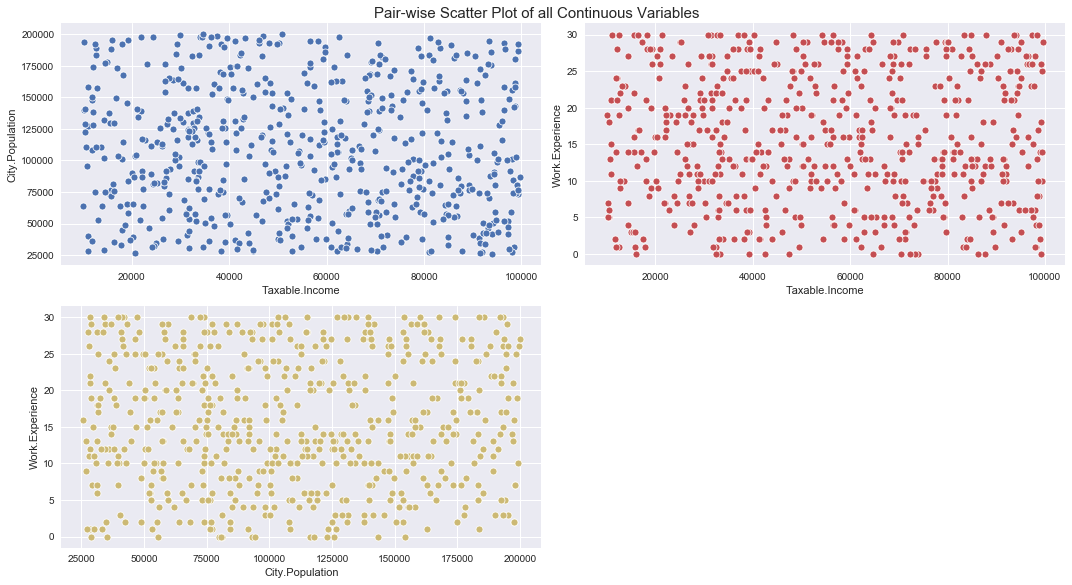

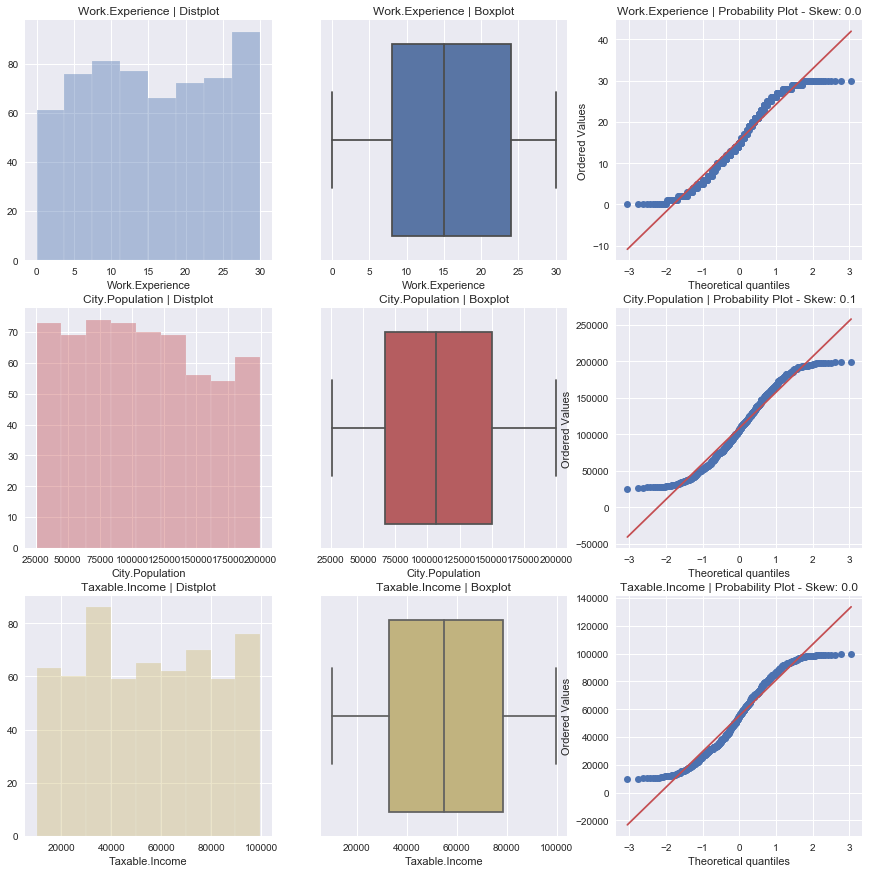

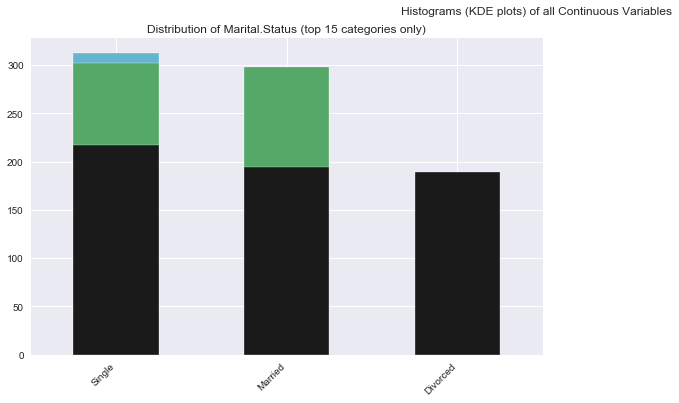

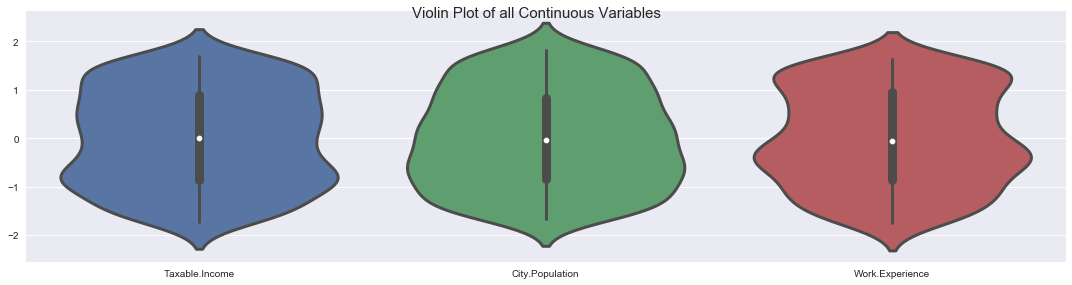

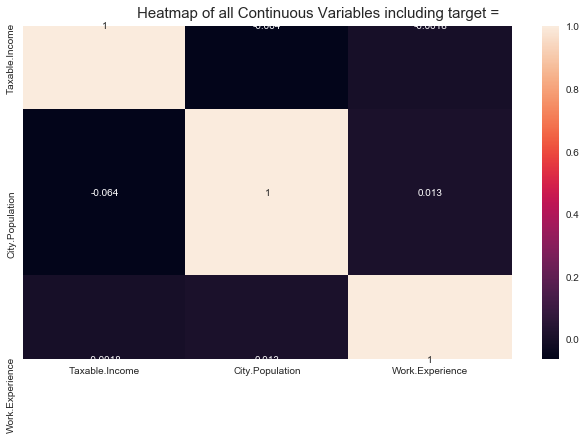

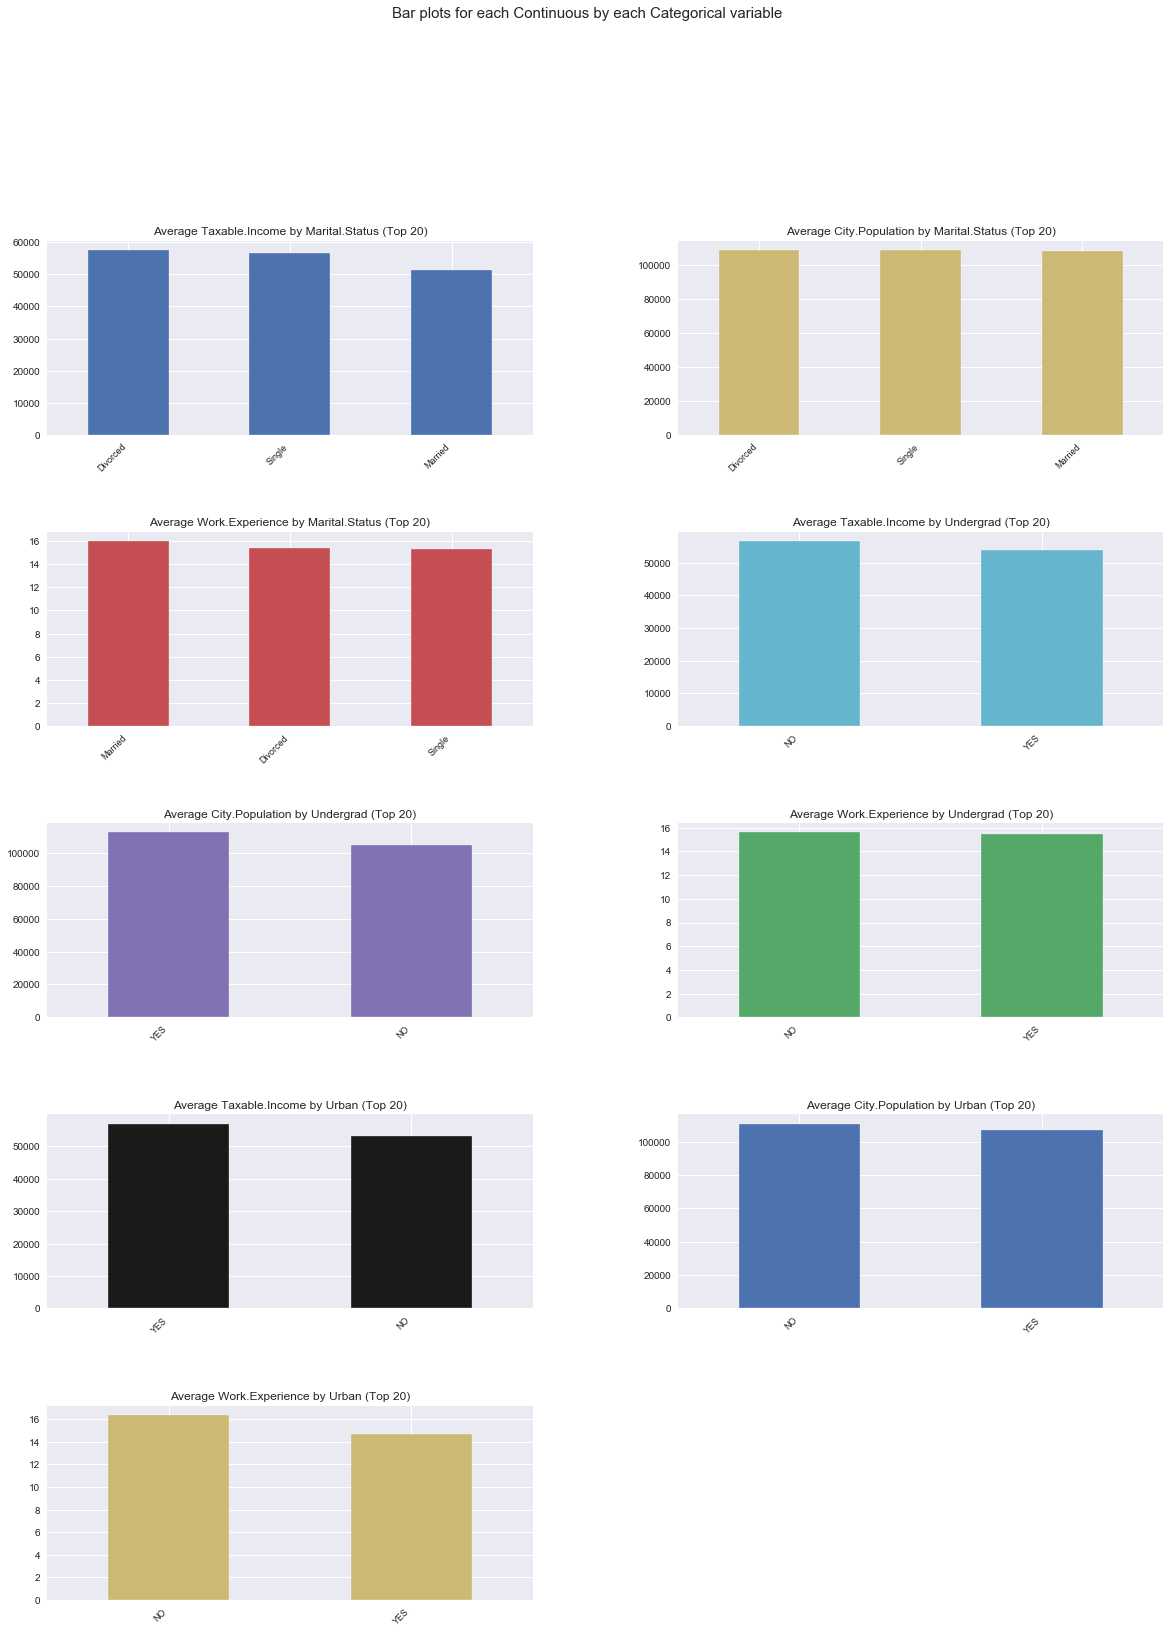

Time to run AutoViz (in seconds) = 10.374

 ###################### VISUALIZATION Completed ########################


In [83]:
from autoviz.AutoViz_Class import AutoViz_Class
AV=AutoViz_Class()
filename='Fraud_check.csv'
dft = AV.AutoViz(filename,depVar="",dfte=None, header=0, verbose=0, lowess=False, 
                 chart_format='svg', max_rows_analyzed=150000, max_cols_analyzed=30)

In [66]:
df = df.rename(columns={'Marital.Status':'marital_status','Taxable.Income':'taxable_income','City.Population':'city_population','Work.Experience':'work_exp',})
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [67]:
df['is_Check']= ['Risky' if x <= 30000 else 'Good' for x in df['taxable_income']]
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [68]:
label_encoder = preprocessing.LabelEncoder()
df['Risky'] = label_encoder.fit_transform(df['is_Check'])

In [69]:
df['Mar_status'] = label_encoder.fit_transform(df.marital_status)

In [70]:
df['Graduate'] = label_encoder.fit_transform(df.Undergrad)

In [71]:
df['urban'] = label_encoder.fit_transform(df.Urban)

In [72]:
df

,Undergrad,marital_status,taxable_income,city_population,work_exp,Urban,is_Check,Risky,Mar_status,Graduate,urban
0,NO,Single,68833,50047,10,YES,Good,0,2,0,1
1,YES,Divorced,33700,134075,18,YES,Good,0,0,1,1
2,NO,Married,36925,160205,30,YES,Good,0,1,0,1
3,YES,Single,50190,193264,15,YES,Good,0,2,1,1
4,NO,Married,81002,27533,28,NO,Good,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good,0,0,1,1
596,YES,Divorced,69967,55369,2,YES,Good,0,0,1,1
597,NO,Divorced,47334,154058,0,YES,Good,0,0,0,1
598,YES,Married,98592,180083,17,NO,Good,0,1,1,0


In [73]:
df = df.drop(['Undergrad','marital_status','Urban','is_Check','taxable_income'],axis=1)

In [74]:
df

,city_population,work_exp,Risky,Mar_status,Graduate,urban
0,50047,10,0,2,0,1
1,134075,18,0,0,1,1
2,160205,30,0,1,0,1
3,193264,15,0,2,1,1
4,27533,28,0,1,0,0
...,...,...,...,...,...,...
595,39492,7,0,0,1,1
596,55369,2,0,0,1,1
597,154058,0,0,0,0,1
598,180083,17,0,1,1,0


In [75]:
df=df[['city_population','work_exp',"Mar_status",'Graduate','urban','Risky']]
df

,city_population,work_exp,Mar_status,Graduate,urban,Risky
0,50047,10,2,0,1,0
1,134075,18,0,1,1,0
2,160205,30,1,0,1,0
3,193264,15,2,1,1,0
4,27533,28,1,0,0,0
...,...,...,...,...,...,...
595,39492,7,0,1,1,0
596,55369,2,0,1,1,0
597,154058,0,0,0,1,0
598,180083,17,1,1,0,0


In [33]:
X = df.iloc[:,0:5].values
y = df.iloc[:,5].values

In [34]:
df['Risky'].unique()

array([0, 1], dtype=int64)

In [35]:
df['Risky'].value_counts()

0    476
1    124
Name: Risky, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3 , random_state=0)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=10 , random_state=0)

#Train the model using the training sets 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [49]:
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

print("confusion_matrix:",metrics.confusion_matrix(y_test, y_pred))

print("Classification_report:",metrics.classification_report(y_test, y_pred))

print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

confusion_matrix: [[128   9]
 [ 38   5]]
Classification_report:               precision    recall  f1-score   support

           0       0.77      0.93      0.84       137
           1       0.36      0.12      0.18        43

    accuracy                           0.74       180
   macro avg       0.56      0.53      0.51       180
weighted avg       0.67      0.74      0.68       180

Accuracy: 73.88888888888889


In [77]:
for i in range(len(clf.estimators_)):
    print(tree.export_text(clf.estimators_[i]))

|--- feature_2 <= -0.69
|   |--- feature_4 <= -0.02
|   |   |--- feature_0 <= -1.62
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  -1.62
|   |   |   |--- feature_1 <= 0.60
|   |   |   |   |--- feature_1 <= -0.51
|   |   |   |   |   |--- feature_1 <= -0.63
|   |   |   |   |   |   |--- feature_3 <= -0.02
|   |   |   |   |   |   |   |--- feature_0 <= -1.53
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_0 >  -1.53
|   |   |   |   |   |   |   |   |--- feature_1 <= -1.13
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- feature_1 >  -1.13
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- feature_3 >  -0.02
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- feature_1 >  -0.63
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  -0.51
|   |   |   |   |   |--- feature_0 <= 0.71
|   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |-

In [ ]:
#All the decision trees in our random forest can be viewed.

In [7]:
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
import seaborn as sns

In [8]:
df=pd.read_csv("Company_data.csv")
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


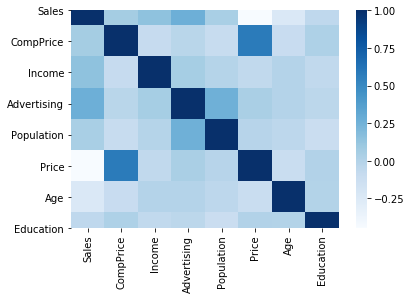

In [9]:
cor = df.corr()
sns.heatmap(cor,cmap='Blues')

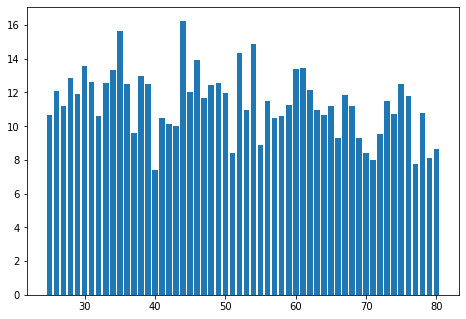

In [22]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Age,df.Sales)
plt.show()

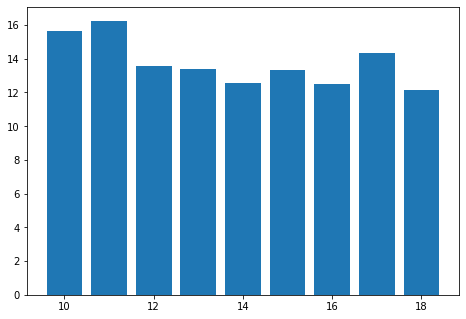

In [25]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Education,df.Sales)
plt.show()

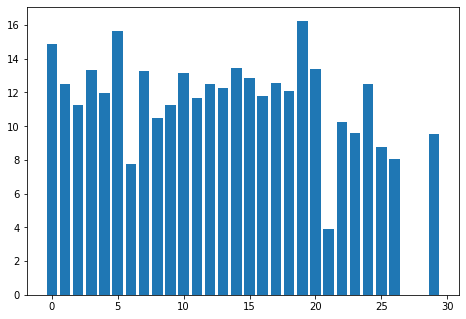

In [26]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(df.Advertising,df.Sales)
plt.show()

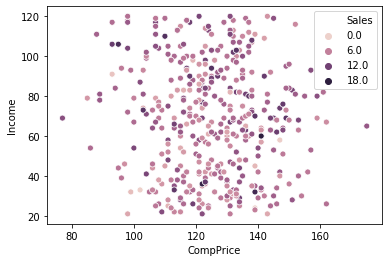

In [4]:
sns.scatterplot(df['CompPrice'],df['Income'],hue=df['Sales'])

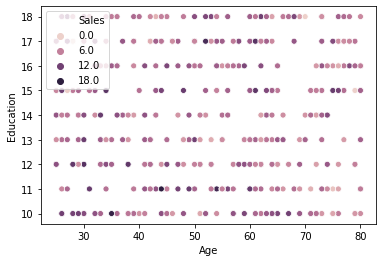

In [47]:
sns.scatterplot(df['Age'],df['Education'],hue=df['Sales'])

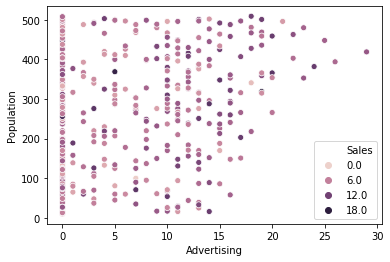

In [48]:
sns.scatterplot(df['Advertising'],df['Population'],hue=df['Sales'])

In [49]:
label_encoder = preprocessing.LabelEncoder()
df['Urban'] = label_encoder.fit_transform(df['Urban'])
df['US'] = label_encoder.fit_transform(df['US'])

In [50]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [51]:
df1=pd.get_dummies(df,columns=['ShelveLoc'])

In [52]:
df1

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,42,17,1,1,1,0,0
1,11.22,111,48,16,260,83,65,10,1,1,0,1,0
2,10.06,113,35,10,269,80,59,12,1,1,0,0,1
3,7.40,117,100,4,466,97,55,14,1,1,0,0,1
4,4.15,141,64,3,340,128,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1,1,0,1,0
396,6.14,139,23,3,37,120,55,11,0,1,0,0,1
397,7.41,162,26,12,368,159,40,18,1,1,0,0,1
398,5.94,100,79,7,284,95,50,12,1,1,1,0,0


In [53]:
df1 = df1.astype({"Sales":'category'})

In [54]:
X=df1.iloc[:,1:]
y=df1.iloc[:,0]

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=(train_test_split(X,y,test_size=.3,random_state=0))
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [82]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=20 , random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=20,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [83]:
y_pred=regressor.predict(X_test)

In [84]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.2254833333333335
Mean Squared Error: 2.4053407250000007
Root Mean Squared Error: 1.5509160921855187


In [86]:
from sklearn.feature_selection import SelectFromModel

In [87]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, th

In [88]:
sel.get_support()

array([ True, False, False, False,  True,  True, False, False, False,
        True,  True, False])

In [ ]:
#compprice,age,price,ShelveLoc are features/attributes causing high sale.